In [8]:
import pandas as pd

data_path = 'C:/Users/hp/Downloads/all_products.csv'
df = pd.read_csv(data_path)

df.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1


In [9]:
# Basic statistics for 'cost' and 'retail_price'
df[['cost', 'retail_price']].describe()

,cost,retail_price
count,29120.000000,29120.000000
mean,28.481774,59.220164
std,30.624681,65.888927
min,0.008300,0.020000
25%,11.275613,24.000000
50%,19.675081,39.990002
75%,34.440000,69.949997
max,557.151002,999.000000


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df[['cost', 'category', 'brand', 'department']]
y = df['retail_price']

categorical_features = ['category', 'brand', 'department']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[
    ('cat', one_hot_encoder, categorical_features)
], remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

r2

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future vers

0.9797031810517736

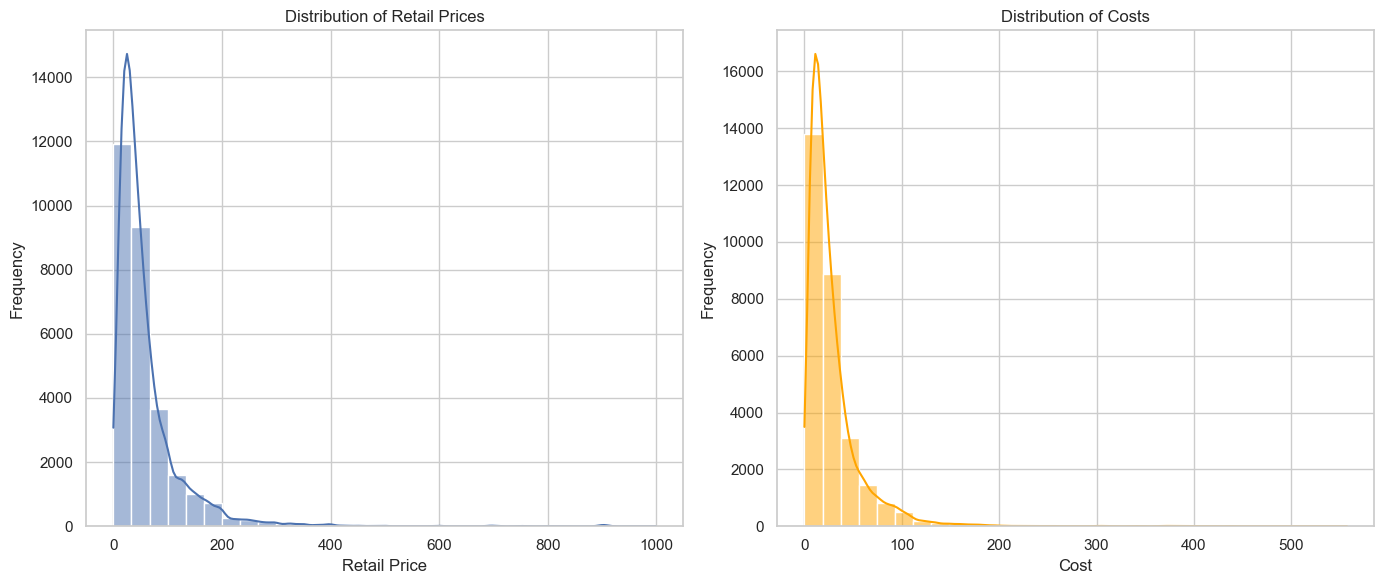

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# 1. Distribution of Retail Prices and Costs
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['retail_price'], bins=30, kde=True)
plt.title('Distribution of Retail Prices')
plt.xlabel('Retail Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['cost'], bins=30, kde=True, color='orange')
plt.title('Distribution of Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

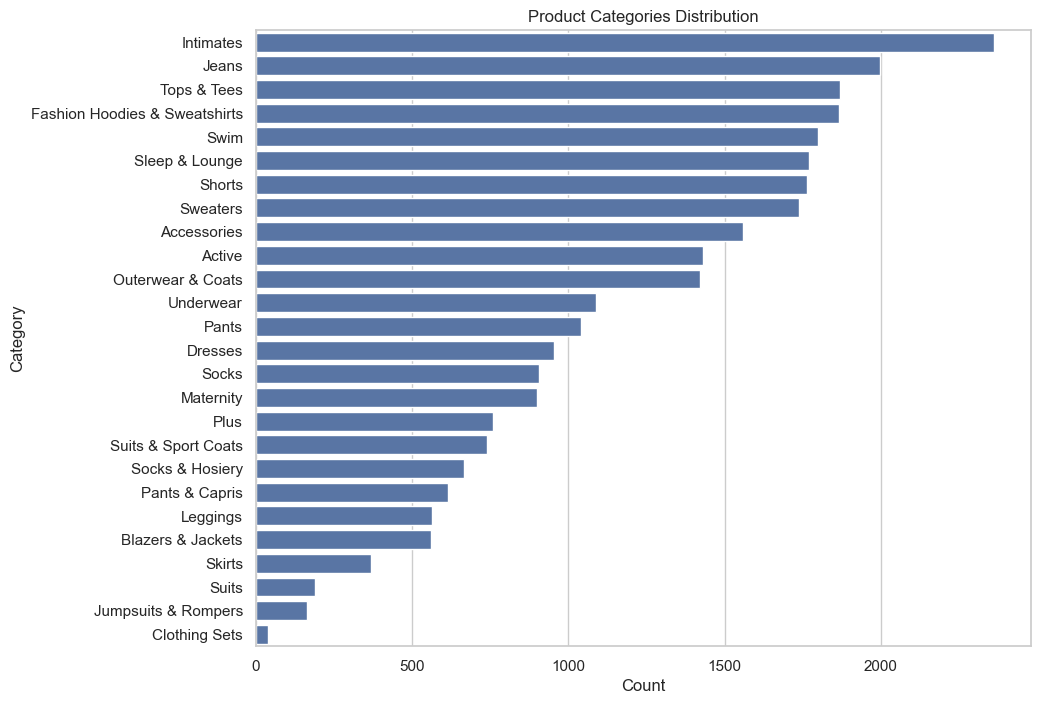

In [26]:
# 2. Category Distribution
plt.figure(figsize=(10, 8))
sns.countplot(y='category', data=df, order = df['category'].value_counts().index)
plt.title('Product Categories Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

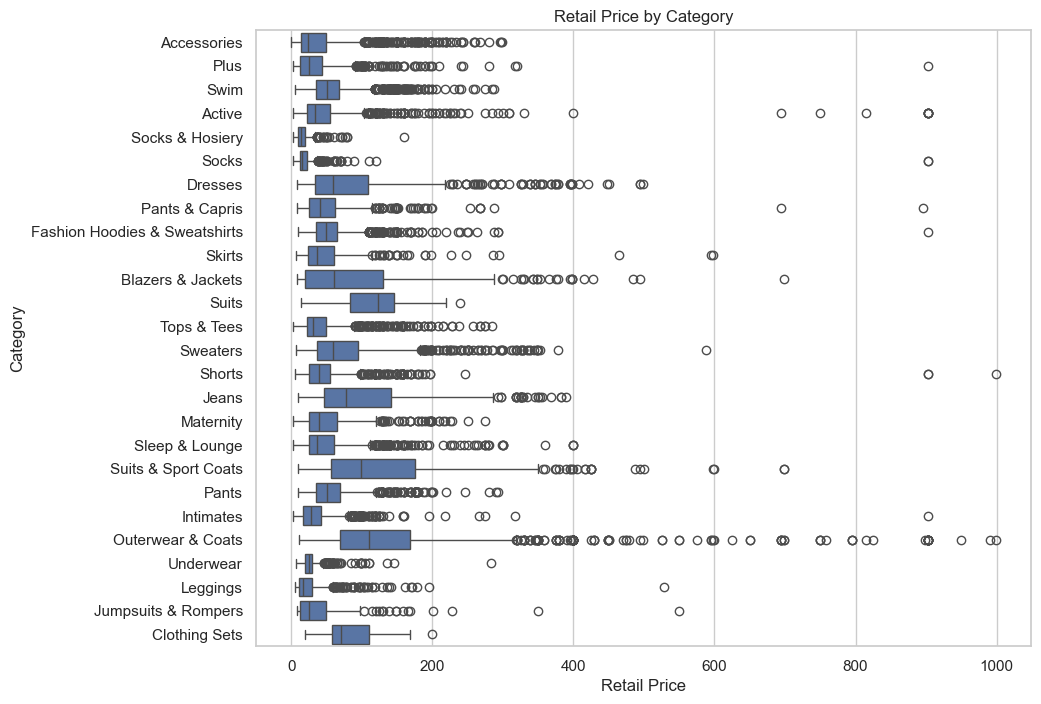

In [27]:
# 3. Retail Price by Category
plt.figure(figsize=(10, 8))
sns.boxplot(x='retail_price', y='category', data=df)
plt.title('Retail Price by Category')
plt.xlabel('Retail Price')
plt.ylabel('Category')
plt.show()

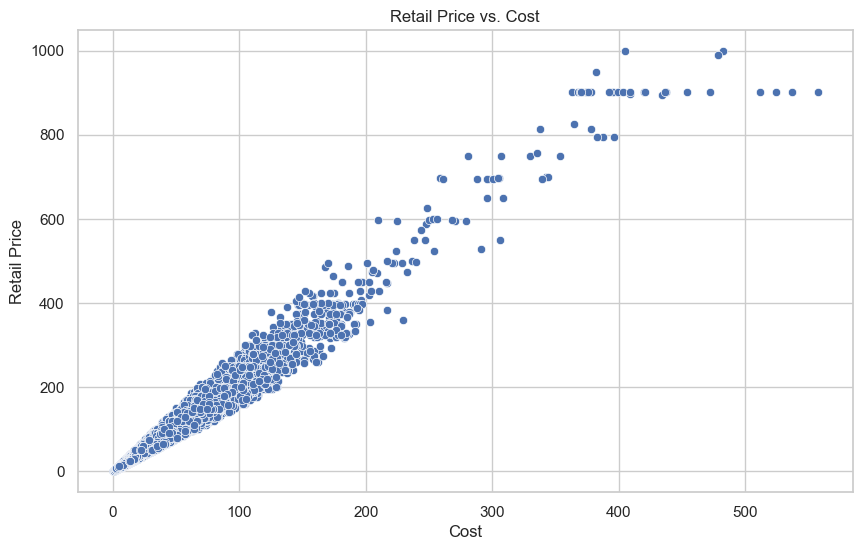

In [28]:
# 4. Retail Price vs. Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost', y='retail_price', data=df)
plt.title('Retail Price vs. Cost')
plt.xlabel('Cost')
plt.ylabel('Retail Price')
plt.show()

In [29]:
def get_optimal_price_updated(product_identifier, df, model):
    if isinstance(product_identifier, int):
        product = df[df['id'] == product_identifier]
    else:
        product = df[df['name'].str.contains(product_identifier, case=False, na=False)]
    
    if product.empty:
        return "Product not found", None, None
    
    features = product[['cost', 'category', 'brand', 'department']]
    predicted_price = model.predict(features)[0]
    margin_percentage = 1.10
    optimal_price = predicted_price * margin_percentage
    actual_price = product['retail_price'].values[0]
    product_details = product.iloc[0].to_dict()
    
    return optimal_price, actual_price, product_details

test_product_name = "Enzyme Regular Solid Army Caps-Black W35S45D" # Example, replace with a valid name or ID from the updated dataset
optimal_price_test, actual_price_test, product_details_test = get_optimal_price_updated(test_product_name, df, model)

actual_price_test

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future vers

10.989999771118164

In [30]:
def get_product_cost(product_identifier, df):
    if isinstance(product_identifier, int):
        product = df[df['id'] == product_identifier]
    else:
        product = df[df['name'].str.contains(product_identifier, case=False, na=False)]
    
    if product.empty:
        return "Product not found", None
    
    cost = product['cost'].values[0]
    product_details = product.iloc[0].to_dict()
    
    return cost, product_details

product_name = "Enzyme Regular Solid Army Caps-Black W35S45D"  # Example product name
product_id = 14115  # Example product ID

cost_by_name, details_by_name = get_product_cost(product_name, df)
cost_by_id, details_by_id = get_product_cost(product_id, df)

(cost_by_name, details_by_name), (cost_by_id, details_by_id)

((4.879559879379869,
  {'id': 14115,
   'cost': 4.879559879379869,
   'category': 'Accessories',
   'name': 'Enzyme Regular Solid Army Caps-Black W35S45D',
   'brand': 'MG',
   'retail_price': 10.989999771118164,
   'department': 'Women',
   'sku': 'EE364229B2791D1EF9355708EFF0BA34',
   'distribution_center_id': 1}),
 (4.879559879379869,
  {'id': 14115,
   'cost': 4.879559879379869,
   'category': 'Accessories',
   'name': 'Enzyme Regular Solid Army Caps-Black W35S45D',
   'brand': 'MG',
   'retail_price': 10.989999771118164,
   'department': 'Women',
   'sku': 'EE364229B2791D1EF9355708EFF0BA34',
   'distribution_center_id': 1}))